# 遥感图像实例分割

Zero-shot Instance Segmentation of Remote Sensing Images

本代码基于以下材料：


*   https://arxiv.org/abs/2004.14875
*   https://github.com/Lydorn/Polygonization-by-Frame-Field-Learning

这段代码用来带领大家实现实例分割。以下代码首先采用Zero-shot的方式，即在不训练的情况下，利用现有的checkpoint，实现实例分割。

接下来，大家采用给定数据集，对模型进行训练，提高模型的效果

有问题联系助教刘泽平


## 研究准备

### **步骤1：下载代码并解压**






In [ ]:
# 下载代码并解压
!pip install -U --no-cache-dir gdown --pre
!gdown --id 15VcT-ORrcnxgc4K0HSOHrV_2KAX8sect --output "code.zip"
!unzip code.zip

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=15VcT-ORrcnxgc4K0HSOHrV_2KAX8sect
From (redirected): https://drive.google.com/uc?id=15VcT-ORrcnxgc4K0HSOHrV_2KAX8sect&confirm=t&uuid=ea7d086e-bb3b-4f93-ae22-f3bf827a86c0
To: /content/code.zip
100% 851M/851M [00:14<00:00, 59.1MB/s]
Archive:  code.zip
   creating: Polygonization-by-Frame-Field-Learning-master/
  inflating: Polygonization-by-Frame-Field-Learning-master/.gitmodules  
   creating: Polygonization-by-Frame-Field-Learning-master/.idea/
  inflating: Polygonization-by-Frame-Field-Learning-master/.idea/.gitignore  
  inflating: Polygonization-by-Frame-Fiel

### **步骤2：切换到代码目录**

In [ ]:
cd /content/Polygonization-by-Frame-Field-Learning-master

/content/Polygonization-by-Frame-Field-Learning-master


### **步骤3：配置环境**

In [ ]:
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn
!pip install imagecodecs
!pip install -r requirements.txt
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.2 MB/s eta 0:

In [ ]:
!mv /content/Polygonization-by-Frame-Field-Learning-master/frame_field_learning/runs/inria_dataset_polygonized.unet_resnet101_pretrained.leaderboard\ _\ 2020-06-02\ 07_57_31 /content/Polygonization-by-Frame-Field-Learning-master/frame_field_learning/runs/inria_dataset_polygonized.unet_resnet101_pretrained.leaderboard\ \|\ 2020-06-02\ 07\:57\:31

## 进行实验

### **步骤4：运行代码**

格式为 **!python main.py --run_name inria_dataset_polygonized.unet_resnet101_pretrained.leaderboard --in_filepath <图像路径>**

我们提供了实例图像，来自Inria数据集的Austin区域的影像

如果想修改模型的输入影像，修改<图像路径>即可

In [ ]:
!python main.py --run_name inria_dataset_polygonized.unet_resnet101_pretrained.leaderboard --in_filepath /content/Polygonization-by-Frame-Field-Learning-master/data/austin1_WGS84.tif

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to models/hub/checkpoints/resnet101-63fe2227.pth
100% 171M/171M [00:02<00:00, 69.8MB/s]
Loading model...
Loading best val checkpoint: /content/Polygonization-by-Frame-Field-Learning-master/frame_field_learning/runs/inria_dataset_polygonized.unet_resnet101_pretrained.leaderboard | 2020-06-02 07:57:31/

### **看看结果怎么样**

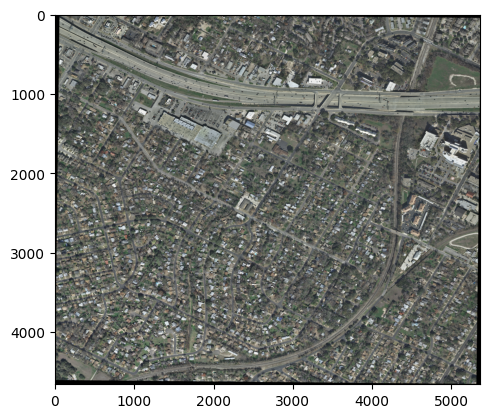

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
# 首先看一下输入模型的影像
rgb_tif_path = '/content/Polygonization-by-Frame-Field-Learning-master/data/austin1_WGS84.tif'

# 打开 RGB TIFF 文件
with rasterio.open(rgb_tif_path) as src:
    # 读取 RGB TIFF 文件中的数据
    rgb_data = src.read()
    # 显示 RGB 图像
    show(rgb_data)

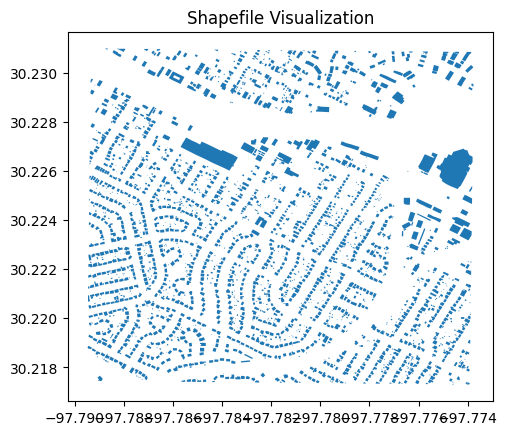

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 接下来看一下模型的输出(shapefile)
shapefile_path = '/content/Polygonization-by-Frame-Field-Learning-master/data/poly_shapefile.acm.tol_1/austin1_WGS84.shp'
gdf = gpd.read_file(shapefile_path)

# 可视化矢量文件
gdf.plot(aspect='equal')
plt.title('Shapefile Visualization')
plt.show()

In [ ]:
import shutil
from google.colab import files

# 接下来，我们把航拍影像，和对应的矢量文件下载下来，可以用导入到arcmap中进行观察

def zip_and_download(folder_path):
    shutil.make_archive('/content/downloaded_folder', 'zip', folder_path)
    shutil.move('/content/downloaded_folder.zip', '/content/downloaded_folder.zip')
    download_link = '/content/downloaded_folder.zip'
    files.download(download_link)

zip_and_download("/content/Polygonization-by-Frame-Field-Learning-master/data/poly_shapefile.acm.tol_1")
files.download("/content/Polygonization-by-Frame-Field-Learning-master/data/austin1_WGS84.tif")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Austin其他区域建筑物识别**

学习代码，并根据本次实习中提供的其他区域影像，尝试得到对应的识别结果


这个压缩包内提供了新的影像，可以直接使用

In [ ]:
# 下载Austin其他区域影像
!gdown --id 1EoLJc-a7VlhnTYUybes8aRr_91p6g8MO --output "additional_data_new.zip" # 如果手动下载了压缩包并上传到文件里，请注释掉这行代码

!unzip additional_data_new.zip

In [ ]:
# 你来完成

### **使用自己的遥感图像，并进行建筑物识别**

相比于本次实习提供的影像的识别结果，你自己的遥感图像的识别结果是更好，还是更坏，请思考为什么

输入影像必须满足以下要求：

1. 图像只有三个波段 (例如RGB波段)
2. 图像宽高大于1024*1024
3. jpg,tif,png格式
4. 带有坐标系(推荐)

运行结束后，会在自己上传的图像的相同路径下，看到poly_shapefile.acm.tol_1 文件夹，这个文件夹下是输入图像对应的识别结果(shapefile格式)

In [ ]:
# 你来完成

### **有什么办法可以改进识别结果吗**

如何改进识别结果？一种更好的办法是采用微调，或重新训练的方式，即收集一定的影像-标签对，来让模型对新数据进行参数优化

有关怎么对本文使用的模型进行微调，请阅读该模型的技术手册
https://github.com/Lydorn/Polygonization-by-Frame-Field-Learning

In [ ]:
# 你来完成

## 你需要做什么

**基本要求**


*   弄明白这些代码都在干什么



**中等要求**

*   在Austin其他区域进行建筑物轮廓识别


*   在自己收集的影像上，进行建筑物轮廓识别

**终极要求**

*   通过对现有模型微调，或重新训练的方式，改进预测结果
